<a href="https://colab.research.google.com/github/Swethaa-sri/Task_cl/blob/main/Copy_of_Assignment8_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [11]:
df = pd.read_csv("car_data.csv")

In [52]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


#### Tasks, Part 1

#### Find the linear regression equation for mileage vs price.

In [4]:
X = df.iloc[:,1].values
y = df.iloc[:,0].values

In [11]:
X = X.reshape(-1,1)
X.shape

(804, 1)

In [12]:
y.shape

(804,)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [25]:
intercept = regressor.intercept_
coef = regressor.coef_
print('intercept :', intercept)
print('coef :', coef)

print('Linear regression equation :', 'price', ' = ', coef , '*', ' mileage ', '+', intercept  )

intercept : 24764.559006061685
coef : [-0.1725205]
Linear regression equation : price  =  [-0.1725205] *  mileage  + 24764.559006061685


##### Chart the original data and the equation on the chart.

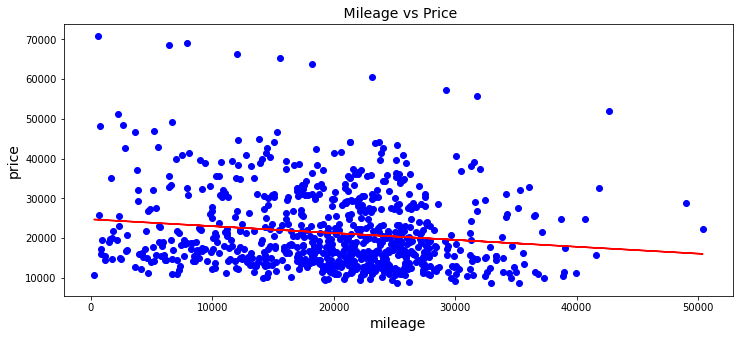

In [30]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.scatter(X,y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'red')
plt.xlabel('mileage', fontsize = 14)
plt.ylabel('price', fontsize = 14)
plt.title(' Mileage vs Price', fontsize = 14)
plt.show()

##### Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [32]:
s = regressor.score(X,y)
print('R-square score :', s)
print('R - square score is very very low, hence the equation is not a good fit for this data ')

R-square score : 0.02046344732348926
R - square score is very very low, hence the equation is not a good fit for this data 


#### Tasks, Part 2

##### Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [33]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [39]:
X = df.iloc[:,[1,6,7,8,9,10,11]].values
y = df.iloc[:,0].values

In [40]:
regressor.fit(X,y)

LinearRegression()

In [44]:
col = ['mileage','cylinder','liters', 'doors', 'cruise', 'sound', 'leather']
print('coeff :',list(zip(col, regressor.coef_)))
print('intercept :', regressor.intercept_)

coeff : [('mileage', -0.16974783233303692), ('cylinder', 3792.378930782515), ('liters', -787.2207316338321), ('doors', -1542.745846382068), ('cruise', 6288.997149849932), ('sound', -1993.795275698427), ('leather', 3349.361619613555)]
intercept : 6758.755143598106


In [48]:
s = regressor.score(X,y)
print('R -square score using :',col, 'is', s)
print( ' 0.45 is not a good fit for this data')

R -square score using : ['mileage', 'cylinder', 'liters', 'doors', 'cruise', 'sound', 'leather'] is 0.4462643536728379
 0.45 is not a good fit for this data


#### Tasks, Hard Mode

##### Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [64]:
df1 = df[['Make','Model','Type']]
df1.head()

,Make,Model,Type
0,Buick,Century,Sedan
1,Buick,Century,Sedan
2,Buick,Century,Sedan
3,Buick,Century,Sedan
4,Buick,Century,Sedan


In [65]:
df1['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [66]:
df1['Model'].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [67]:
df1['Type'].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [69]:
df1_with_dummies = pd.get_dummies(df1, columns = ['Model'])
df1_with_dummies.head()

,Make,Type,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,Model_9_5 HO,Model_AVEO,Model_Bonneville,Model_CST-V,Model_CTS,Model_Cavalier,Model_Century,Model_Classic,Model_Cobalt,Model_Corvette,Model_Deville,Model_G6,Model_GTO,Model_Grand Am,Model_Grand Prix,Model_Impala,Model_Ion,Model_L Series,Model_Lacrosse,Model_Lesabre,Model_Malibu,Model_Monte Carlo,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8
0,Buick,Sedan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Buick,Sedan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Buick,Sedan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Buick,Sedan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Buick,Sedan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
X1 = df1_with_dummies
X2 = X1.iloc[:,:].values
print(X2.shape)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[0,1])] , remainder = 'passthrough' )
X2 = np.array(ct.fit_transform(X2))

(804, 34)


In [121]:
print(X2)

[[1.0 0.0 0.0 ... 0 0 0]
 [1.0 0.0 0.0 ... 0 0 0]
 [1.0 0.0 0.0 ... 0 0 0]
 ...
 [0.0 0.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 0 0 0]]


In [122]:
X2.shape

(804, 43)

##### Find the best combination of factors to predict price.

In [ ]:
columns = ['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

In [ ]:
# features with string categories
cat_col = ['Make','Type']

In [ ]:
# features with mix of numerical and string 
cat_mix = ['Trim','Model']

In [85]:
df['Trim'].unique()


array(['Sedan 4D', 'CX Sedan 4D', 'CXL Sedan 4D', 'CXS Sedan 4D',
       'Custom Sedan 4D', 'Limited Sedan 4D', 'Special Ed Ultra 4D',
       'DHS Sedan 4D', 'DTS Sedan 4D', 'Hardtop Conv 2D',
       'LS Hatchback 4D', 'LS Sedan 4D', 'LT Hatchback 4D', 'LT Sedan 4D',
       'SVM Hatchback 4D', 'SVM Sedan 4D', 'Coupe 2D', 'LS Coupe 2D',
       'LS Sport Coupe 2D', 'LS Sport Sedan 4D', 'Conv 2D', 'SS Sedan 4D',
       'LS MAXX Hback 4D', 'LT MAXX Hback 4D', 'MAXX Hback 4D',
       'LT Coupe 2D', 'SS Coupe 2D', 'GXP Sedan 4D', 'SE Sedan 4D',
       'SLE Sedan 4D', 'GT Sedan 4D', 'GT Coupe 2D', 'GTP Sedan 4D',
       'AWD Sportwagon 4D', 'GT Sportwagon', 'Sportwagon 4D',
       'Linear Conv 2D', 'Linear Sedan 4D', 'Aero Conv 2D',
       'Aero Sedan 4D', 'Arc Conv 2D', 'Arc Sedan 4D', 'Arc Wagon 4D',
       'Linear Wagon 4D', 'Aero Wagon 4D', 'Quad Coupe 2D',
       'L300 Sedan 4D'], dtype=object)

In [86]:
df['Model'].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [87]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [88]:
df['Type'].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [90]:
columns = ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
col_combi = [columns[i:j] for i in range(len(columns)) for j in range(i+1, len(columns)+1)]
print(col_combi)       

[['Mileage'], ['Mileage', 'Make'], ['Mileage', 'Make', 'Model'], ['Mileage', 'Make', 'Model', 'Trim'], ['Mileage', 'Make', 'Model', 'Trim', 'Type'], ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder'], ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter'], ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors'], ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound'], ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], ['Make'], ['Make', 'Model'], ['Make', 'Model', 'Trim'], ['Make', 'Model', 'Trim', 'Type'], ['Make', 'Model', 'Trim', 'Type', 'Cylinder'], ['Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter'], ['Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors'], ['Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Make', 'Model', 'Trim', 'Ty

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [129]:
y = df.iloc[:,0].values


In [143]:
# function to find best combination to predict price
scores = []
sco = []
cat_col = ['Make','Type']
cat_mix = ['Trim','Model']
for n in col_combi:
  c = [d for d in n if d in cat_col]
  m = [w for w in n if w in cat_mix]
  n1 = [y for y in n if y not in cat_col and y not in cat_mix]
  if len(c) > 0 and len(m) == 0:
    df_c = df[c]
    df_n1 = df[n1]
    X_n = df_n1.iloc[:,:].values
    X_c = df_c.iloc[:,:].values
    ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(sparse = False), [u for u in range(len(c))])] , remainder = 'passthrough' )
    X_c = np.array(ct.fit_transform(X_c))
    #print(X_c)
    b = np.concatenate((X_n, X_c),1)
    regressor.fit(b,y)
    s = regressor.score(b,y)
    scores.append((s,n))
    sco.append(s)
  if len(c) > 0 and len(m) > 0:
    df_m = df[m]
    df_c1 = df[c]
    df_n2 = df[n1]
    df_dummies = pd.get_dummies(df_m, columns = m)
    X_dum = df_dummies.iloc[:,:].values
    X_c1 = df_c1.iloc[:,:].values
    X_n3 = df_n2.iloc[:,:].values
    ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(sparse = False), [u for u in range(len(c))])] , remainder = 'passthrough' )
    X_c1 = np.array(ct.fit_transform(X_c1))
    b1 = np.concatenate((X_n3, X_c1,X_dum),1)
    regressor.fit(b1,y)
    s1 = regressor.score(b1,y)
    scores.append((s1,n))
    sco.append(s1)
  if len(c) == 0 and len(m) > 0:
    df_m1 = df[m]
    df_n3 = df[n1]
    df_dummies1 = pd.get_dummies(df_m1, columns = m)
    X_dum1 = df_dummies1.iloc[:,:].values
    X_n4 = df_n3.iloc[:,:].values
    b2 = np.concatenate((X_n4, X_dum1),1)
    regressor.fit(b2,y)
    s2 = regressor.score(b2,y)
    scores.append((s2,n))
    sco.append(s2)



#print(scores) 
m_sco = max(sco)
f = [z for z in scores if z[0] == m_sco]
print(f)


  

[(0.9924082614213805, ['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'])]
